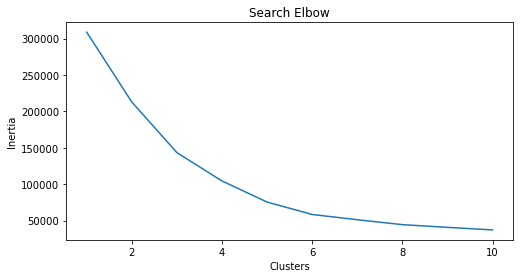

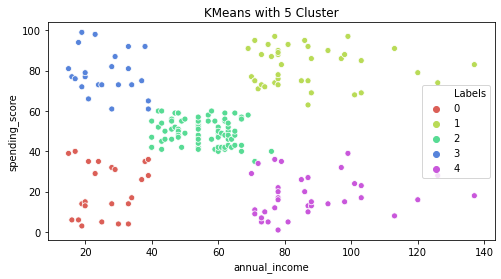

In [10]:
# import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9cde62253adc47b299b000494f9ea1ec = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9bSHEJbvlAqx2CW00PINrr6xkaRVgrITIXi8UtPnuej-',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_9cde62253adc47b299b000494f9ea1ec.get_object(Bucket='machinelearning-donotdelete-pr-9v2w3ux9zhhjqi',Key='Mall_Customers.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)


# ubah nama kolom
df_data_1 = df_data_1.rename(columns={'Gender': 'gender', 'Age': 'age',
                        'Annual Income (k$)': 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# ubah data kategorik mmenjadi data numerik
df_data_1['gender'].replace(['Female', 'Male'], [0,1], inplace=True)

df_data_1.head(3)

# menghilangkan kolom customer id dan gender
X = df_data_1.drop(['CustomerID', 'gender'], axis=1)
 
#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Search Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')   


# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(X['annual_income'], X['spending_score'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Cluster')
plt.show()
